In [18]:
import apimoex
import numpy as np
import pandas as pd
import requests 
import matplotlib.pyplot as plt

from typing import NamedTuple

**Задание:**
1. Построить линейный график цен акций ПАО "Сбербанк" (SBER) за последний год, период - 1 день.
2. Построить простую (SMA) и экспоненциальную (EMA) скользящую среднюю с окном сглаживания n = 21 день по ценам закрытия (Close). Установить зеленый цвет для SMA, красный для EMA. В качестве ответа привести таблицу с указанием даты пересечения индикаторов на графике. 

In [69]:
def get_data(ticker: str, start_date: str, end_date: str, interval=24) -> pd.DataFrame:
    """
    Функция возвращает данные о котивках за указанный период в формате  `pd.DataFrame`

    Аргументы:
        ticker, str - Тикер ценной бумаги, название комании другими словами
        start_date, str - Дата начала отсчета данных в формате: "ГГГГ-ММ-ДД"
        end_date, str - Дата конца отсчета данных в формате: "ГГГГ-ММ-ДД"
        interval, int - размер свечи, по умолчанию равен дневному размеру.
            Принимает следующие целые значения:
            1 (1 минута), 10 (10 минут), 60 (1 час), 24 (1 день),
            7 (1 неделя), 31 (1 месяц), 4 (1 квартал)

        Возвращаемое значение:
        data_frame, pd.DataFrame - дата фрейм, содержищий информацию о котировках:
            начало (begin, date), цена открытия (open, float), 
            цена закрытия (close, float), наивысшая цена (high, float),
            низшая цена (low, float), объем (value, float)
    """
    with requests.Session() as session: # open an internet session
        # get candles
        data = apimoex.get_market_candles(session, security=ticker, start=start_date, end=end_date)
    
    # returns     
    df = pd.DataFrame(data)

    return df

In [74]:
TICKER = 'SBER'
start_date = '2022-08-24'
end_date = '2023-09-24'

In [75]:
df = get_data(TICKER, start_date, end_date)
df.head()

,begin,open,close,high,low,value
0,2022-08-24 00:00:00,130.60,128.15,131.64,127.85,5.940974e+09
1,2022-08-25 00:00:00,128.15,128.18,129.81,127.10,4.630468e+09
2,2022-08-26 00:00:00,128.02,130.40,130.50,127.62,4.251007e+09
3,2022-08-29 00:00:00,130.12,131.17,131.40,129.52,5.342794e+09
4,2022-08-30 00:00:00,131.17,130.05,132.60,129.65,6.706724e+09


In [76]:
def prepare_data(df: pd.DataFrame) -> pd.DataFrame:
    _df = df.copy()
    _df['Date'] = pd.to_datetime(_df['begin'])
    _df = _df.drop('begin', axis=1)
    _df = _df.reset_index(drop=True)
    return _df

In [77]:
df = prepare_data(df)
df.describe()

,open,close,high,low,value,Date
count,276.000000,276.000000,276.000000,276.000000,2.760000e+02,276
mean,189.046739,189.345616,191.201739,186.815181,1.137202e+10,2023-03-09 09:28:41.739130368
min,96.550000,101.500000,106.770000,96.500000,1.504731e+09,2022-08-24 00:00:00
25%,137.892500,138.015000,139.350000,136.242500,6.789034e+09,2022-11-29 18:00:00
50%,172.005000,172.540000,174.050000,171.005000,9.555116e+09,2023-03-09 12:00:00
75%,242.350000,242.365000,244.507500,240.577500,1.395447e+10,2023-06-19 06:00:00
max,269.480000,269.110000,273.350000,266.800000,7.248764e+10,2023-09-22 00:00:00
std,54.318166,54.167731,54.334225,54.081469,7.580579e+09,NaN


In [78]:
dates = df['Date']
open_cost = df['open']
close_cost = df['close']

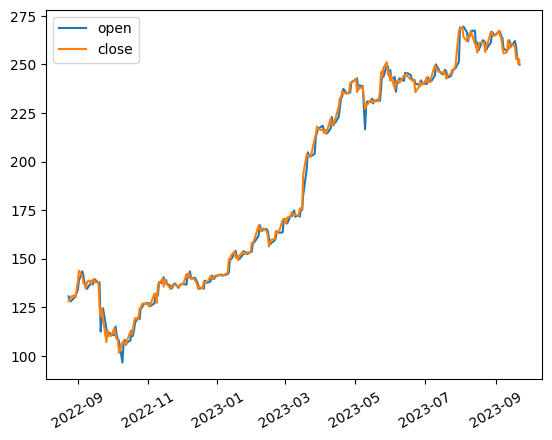

In [79]:
plt.plot(dates, open_cost, label='open')
plt.plot(dates, close_cost, label='close')
plt.xticks(rotation=30)
plt.legend()
plt.show()

In [80]:
class Candle (NamedTuple):
    open: float
    close: float
    high: float
    low: float

    def __str__(self) -> str:
        return f'open {self.open}, close {self.close} high {self.high}, low {self.low}'

In [81]:
def make_candles(df: pd.DataFrame) -> 'list[Candle]':
    data_array = df.loc[:, ['open', 'close', 'high', 'low']].to_numpy()
    output = []
    for _idx, data in  enumerate(data_array):
        output.append(Candle(data[0], data[1], data[2], data[3]))
    return output

In [82]:
candles = make_candles(df)
len(candles)

276